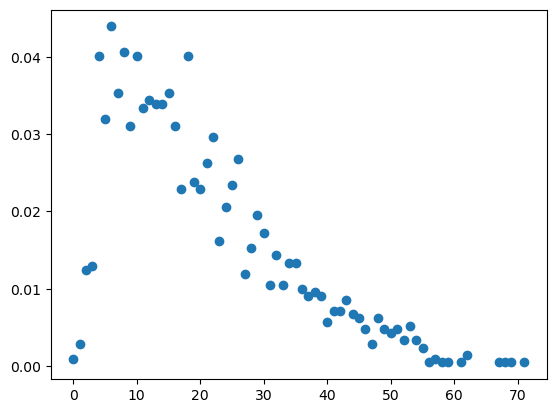

In [1]:
import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../data/nyc.csv')
agent = stats.formulas(df)
# pdf
agent.pdf('Poverty',0)
plt.scatter(agent.vals,agent.probVector)

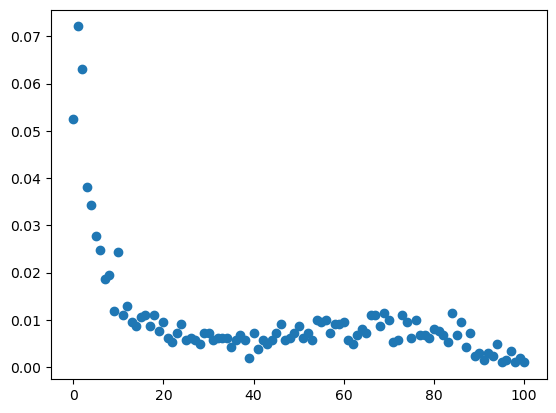

In [2]:
agent.pdf('White',0)
plt.scatter(agent.vals,agent.probVector)

In [3]:
# KNN
agent.set_x_y('White','Income')
agent.init_knn('County')
testNode = agent.nodeList[200]
agent.insert_knn(testNode)
# TODO: scatter plot node.x, node.y


/Users/kjams/Desktop/generalized_model/notebooks/stats.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['node'] = nodeList


In [4]:
# agent.graph[(testNode.x,testNode.y)].append(testNode)
# x = agent.df['node'].tolist()
# agent.knn_predict(x)
#agent.knn_predict(testNode)

m = -0.1824739124121692 
b = 25.550393978858022


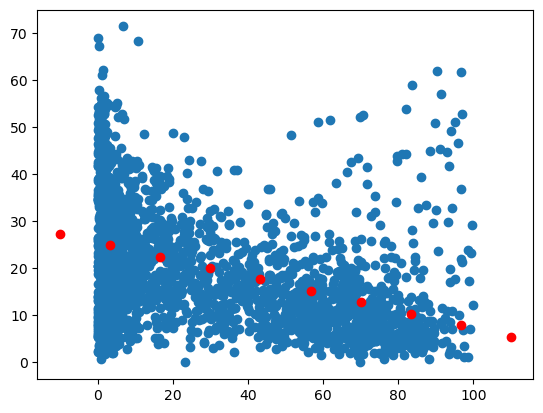

m = 0.06009790832789199 
b = 18.120197448809314


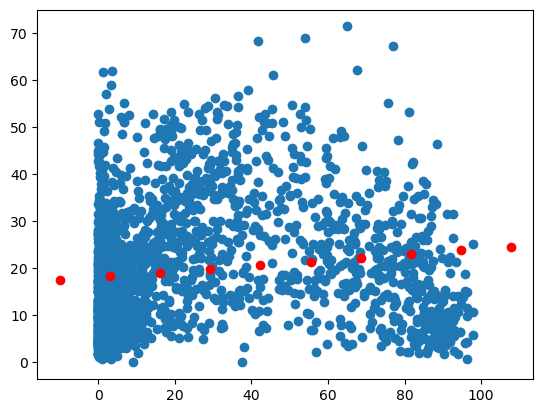

m = -0.003180318735982696 
b = 13.689999826918376


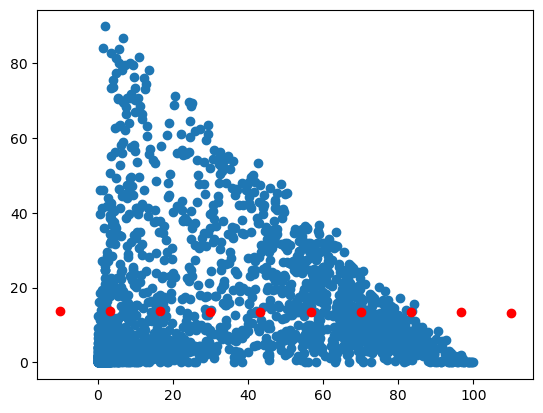

array([13.72180301, 13.67939876, 13.63699451, 13.59459026, 13.55218602,
       13.50978177, 13.46737752, 13.42497327, 13.38256902, 13.34016477])

In [5]:
# linear regression
agent.set_x_y('White', 'Poverty')
agent.linear_regression()
agent.set_x_y('Black', 'Poverty')
agent.linear_regression()
agent.set_x_y('White', 'Asian')
agent.linear_regression()

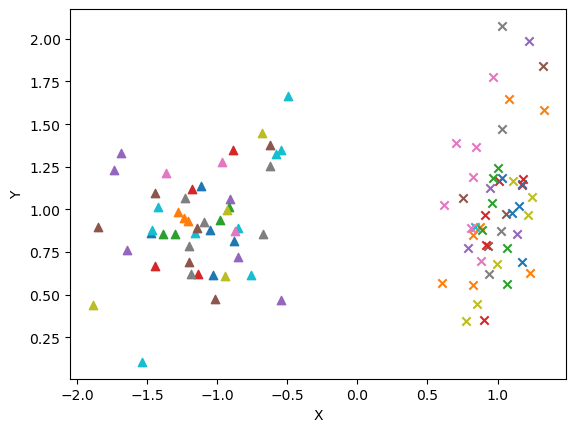

In [6]:
# logistic regression
# Set up data
# optional parameter: dataToProcess => [features,labels]
# default: returns x,y,labels
x,y,labels = agent.prepare_df()
agent.df.head(5)
shapes = {0:'x',1:'^'}

fig, ax = plt.subplots()
for i in range(len(x)):
    ax.scatter(x[i], y[i], marker=shapes[labels[i]])

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()






In [7]:
featuers = list(zip(x,y))
agent.prepare_df([featuers,labels])
agent.df.head(5)


,x,y,label,node
0,-1.049486,0.878644,1,<stats.point object at 0x7fca934ec160>
1,0.878099,0.895511,0,<stats.point object at 0x7fca934ec3d0>
2,0.959288,1.039673,0,<stats.point object at 0x7fca934ec760>
3,-1.180134,1.120622,1,<stats.point object at 0x7fca93288f10>
4,-0.907318,1.060409,1,<stats.point object at 0x7fca93288d60>


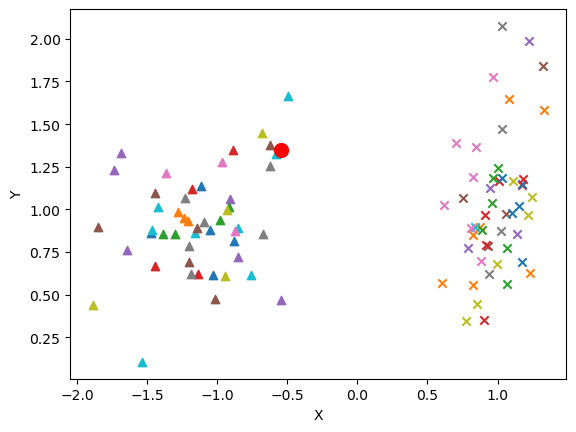

res
[(0.0, (-1.0494863822738634, 0.8786438023828849), 1), (0.0645, (-1.0923082765348864, 0.9268698101370234), 1), (0.0869, (-0.9843772463017403, 0.9362112464079575), 1), (0.0982, (-1.1472282644315164, 0.8886114568841085), 1), (0.1087, (-1.1564950314268887, 0.8598237505632118), 1)]


In [8]:
node = agent.df.iloc[0]['node']
res = agent.knn_predict([node])
print('res')
print(res)



In [ ]:
agent.logistic_regression()